# Алгоритмы на графах
**Задача**: анализ социальных сетей, посчитать метрики на графах. Анализ подписчиков instagram и визуализация

In [32]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
G = nx.petersen_graph()

In [14]:
# Загружаем список друзей в Instagram. Список был получен от самого сервиса в формате JSON
my_connections = pd.read_json("datasets/26/connections.json").reset_index()
my_connections.rename(columns={'index': 'target'}, inplace=True)
my_connections = my_connections[~my_connections.following.isna()].sort_values(by=["following"])[['target']]
my_connections['source'] = 'shokan.iliyas'
my_connections.head()

,target,source
658,makenau,shokan.iliyas
335,dana_ybrayeva,shokan.iliyas
812,perizat.ybrayeva,shokan.iliyas
1019,uma_kz,shokan.iliyas
373,dina_seydaly,shokan.iliyas


In [15]:
# Собрав определенную часть подписчиков спарсил список их контактов
# Тем самым получил список друзей моих друзей в Instagram

friends_connections = pd.read_csv('datasets/26/parsed.csv')[['profileUrl', 'query']]
friends_connections['profileUrl'] = friends_connections['profileUrl'].apply(lambda x: x.split('/')[-1])
friends_connections['query'] = friends_connections['query'].apply(lambda x: x.split('/')[-1])

friends_connections.rename(columns={'profileUrl': 'target', 'query': 'source'}, inplace=True)
friends_connections.head()

,target,source
0,azamat.2706,makenau
1,madihan_madi,makenau
2,darayev_az_06_09_official_,makenau
3,trahimov,makenau
4,serik_kyrantayev,makenau


In [22]:
# Для визуализации сужаем список своих друзей, удаляем из списка друзей, у которых нет друзей
my_connections = my_connections[my_connections['target'].isin(friends_connections['source'])]

# Объемденяем список друзей со списоком друзей моих друзей
df = pd.concat([my_connections, friends_connections])

# Задаем условный вес узлам
df["weight"] = 1

# Визуализация

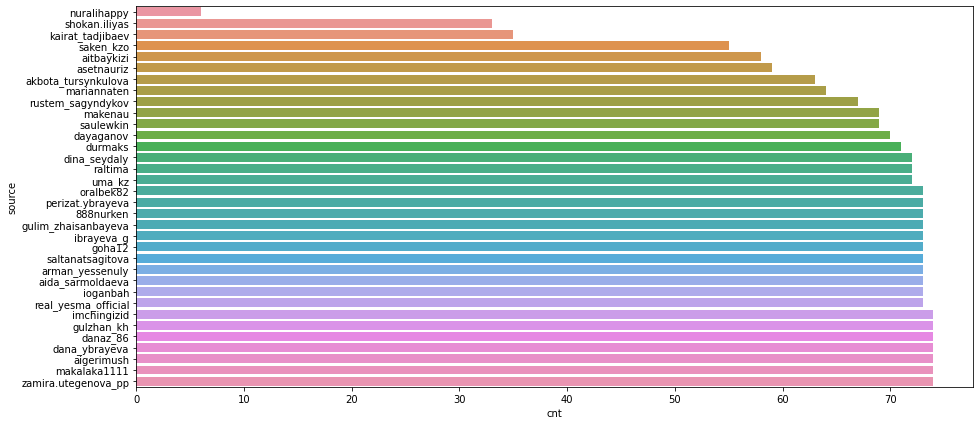

In [24]:
# Выводим список друзей с количеством связей
plt.figure(figsize=(15,7))
data=df.groupby(by='source').size().to_frame('cnt').reset_index().sort_values(by='cnt')
sns.barplot(data=data, x='cnt', y='source', orient='h')
plt.show()

In [26]:
G = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr=True)

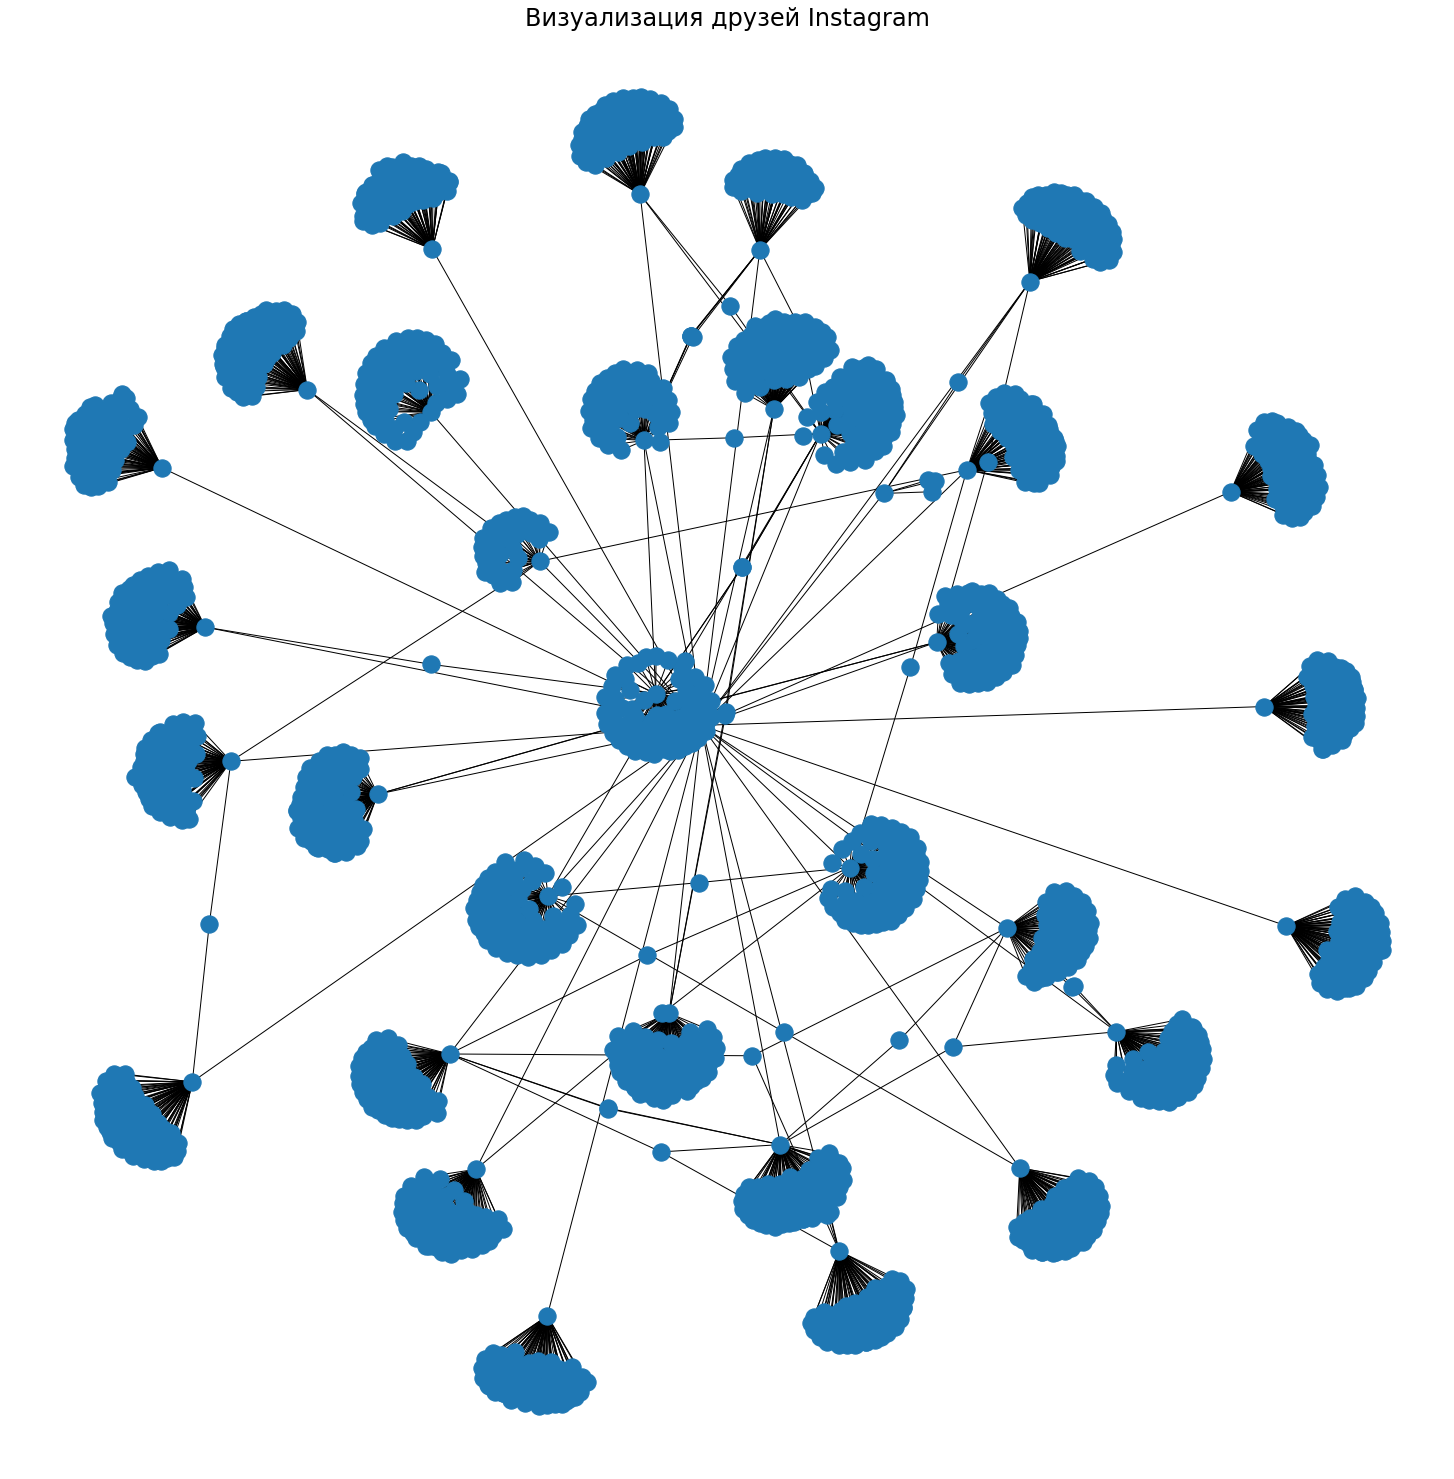

In [29]:
plt.figure(figsize=(20,20))
nx.draw(G)
plt.title("Визуализация друзей Instagram", size=24)
plt.show()

# Метрики

## Betweenness centrality

In [33]:
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality_counts = Counter(betweenness_centrality)
for k, v in betweenness_centrality_counts.most_common(10):
    print(k,v)

shokan.iliyas 0.932365756492337
imchingizid 0.06580323763395744
gulzhan_kh 0.06536707933836271
zamira.utegenova_pp 0.06533482786080502
makalaka1111 0.06533265368047154
saltanatsagitova 0.06492893088396583
ioganbah 0.06446231653783384
aigerimush 0.06445714056709724
uma_kz 0.06405421519723427
raltima 0.06405421519723427


## Degree centrality

In [35]:
degree_centrality = nx.degree_centrality(G)
degree_centrality_counts = Counter(degree_centrality)
for k, v in degree_centrality_counts.most_common(10):
    print(k, v)

gulzhan_kh 0.034358047016274866
danaz_86 0.034358047016274866
dana_ybrayeva 0.033905967450271246
arman_yessenuly 0.033905967450271246
imchingizid 0.033905967450271246
aigerimush 0.033905967450271246
zamira.utegenova_pp 0.033905967450271246
makalaka1111 0.033905967450271246
perizat.ybrayeva 0.03345388788426763
real_yesma_official 0.03345388788426763


## Closeness centrality

In [36]:
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality_counts = Counter(closeness_centrality)
for k, v in closeness_centrality_counts.most_common(10):
    print(k, v)

shokan.iliyas 0.5037576861762696
kairat_tadjibaev 0.3497786211258697
danaz_86 0.3466541294467952
aigerimush 0.3465998119711689
dayaganov 0.3454091193004372
aitbaykizi 0.34470936574723393
gulzhan_kh 0.3444409841170975
raltima 0.3442265795206972
rustem_sagyndykov 0.34369173399627095
arman_yessenuly 0.3428394296342219


# Поиск сообществ (Community detection)

In [ ]:
from networkx.algorithms import community

In [40]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
communities = sorted(map(sorted, next_level_communities))
counter = 0
for c in communities:
    counter = counter + 1
    print('Сообщество ', counter, ' : ', ', '.join([n for n in c]))
    print("\n")

Сообщество  1  :  01m_r, 03.05.s.a, 0502saltanat, 077_aikosha, 077_kz7, 077_ruslan_, 1001_quran_sirlari, 1961tanya, 1984tau, 1991abdreev, 222_a.a.a, 23am1r, 2603z, 3d.raskraski.kz, 3d_best, 4353.m.m, 5794_c, 70_zhandos, 7250murat, 78dayzbefore, 85gulnura, 85pika, 888nurken, 9191boss, ___861305, __aznina__, __issataeva.aa__, __kaigeri16, __mialma___, __nur_ai__, _aelita_888, _aimakhanovasaia, _aselomar_, _b.o.t.a.s.h.k.a_, _babeee_08, _bekzatovich_9, _camelia_boutique, _danyall, _daria_brow_, _eldana.violin_, _gulzada71, _hazizov_, _ilovemymother_, _janatesbolatovna_, _jeromek, _kami_oficial__, _leila_0312_, _luxury__shopping__, _nurgul_aa, _nussipov, _reutova_m, _salon_alina, _svetlanatsoy, _t.tlekeshov03_, _tabigi_onimder, _vvvaloha_, _yersultankyzy_, _yuuriy_, _zarina_amway, _zhakanov__, a.dosymova, a1978asik, a____ra___83, a_assem__, a_b_shym, a_dorba, a_s_e_m_5_7_4_6_9_8_3_, aaa111214, aaa_zz_, aakylbekova1, aaronllih, ab.mnb3, abai066, abajzuanova, abatovadinara_, abbas_abiya, abd